In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("assets/data/slider_audio_dataset.csv", header= None)
dataset.head()

,0,1,2,3,4,5
0,-418.58140,86.146290,13.112919,3.235460,-4.658875,slider_abnormal
1,-430.18576,107.336136,12.131602,21.112997,6.187604,slider_abnormal
2,-419.58572,90.211050,22.299294,13.490429,5.257433,slider_abnormal
3,-437.38270,102.915184,19.436031,20.004710,3.328667,slider_abnormal
4,-407.44833,107.464960,7.370877,24.959505,1.243135,slider_abnormal


In [3]:
dataset.columns= ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','class']

In [31]:
dataset['class'].value_counts()

slider_normal      3204
slider_abnormal     890
Name: class, dtype: int64

In [5]:
data_matrics = dataset.drop('class', axis = 1)
data_matrics.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5
0,-418.58140,86.146290,13.112919,3.235460,-4.658875
1,-430.18576,107.336136,12.131602,21.112997,6.187604
2,-419.58572,90.211050,22.299294,13.490429,5.257433
3,-437.38270,102.915184,19.436031,20.004710,3.328667
4,-407.44833,107.464960,7.370877,24.959505,1.243135


In [6]:
data_matrics_normalized=(data_matrics-data_matrics.mean())/data_matrics.std()

In [32]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(data_matrics_normalized)
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
# data_matrics = data_matrics.join(cluster_labels.to_frame())
# data_matrics.tail()

In [33]:
data_matrics_kmean = data_matrics_normalized.join(cluster_labels.to_frame())

In [34]:
cluster_labels.value_counts()

0    2897
1    1197
Name: cluster, dtype: int64

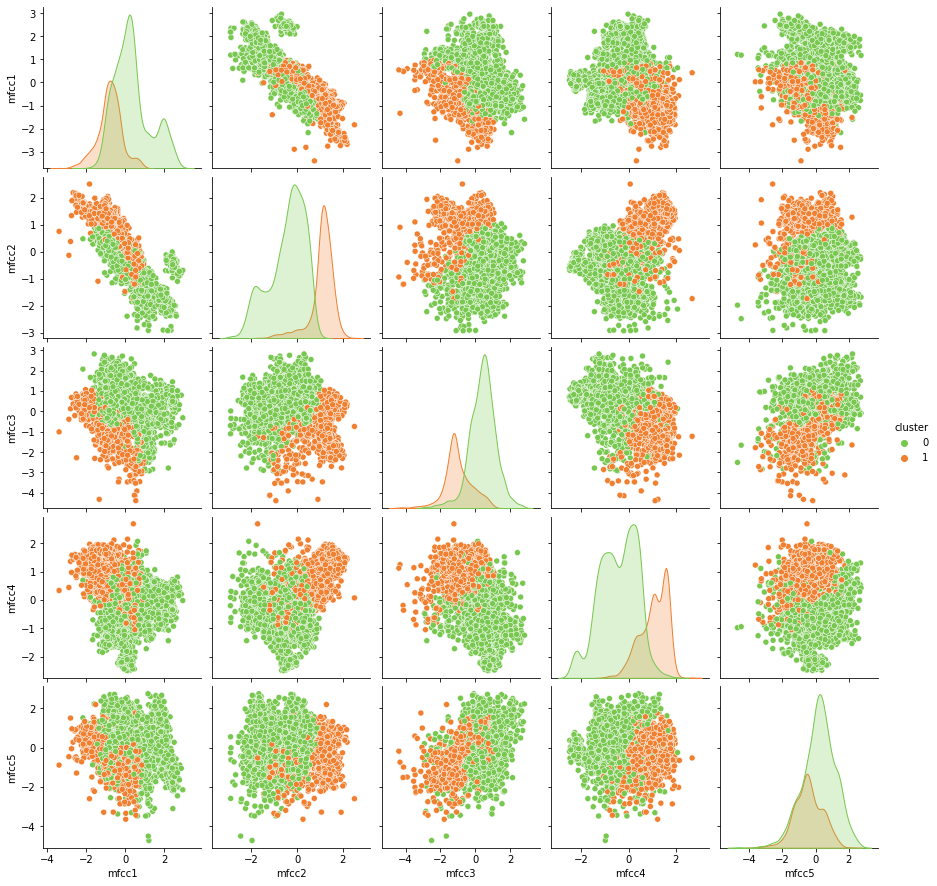

In [47]:
sns.pairplot(data_matrics_kmean, hue = 'cluster', palette=['#78C850', '#F08030'])

In [12]:
from sklearn.cluster import SpectralClustering


In [37]:
SpecCluster= SpectralClustering(n_clusters=2, assign_labels='discretize')
SpecCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(SpecCluster.labels_, name='cluster')

In [38]:
cluster_labels.value_counts()

1    3025
0    1069
Name: cluster, dtype: int64

In [39]:
data_matrics_spec = data_matrics_normalized.join(cluster_labels.to_frame())

In [16]:
data_matrics_spec

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,cluster
0,0.177360,-0.857535,0.720626,-1.741602,-2.020665,0
1,-0.161162,0.026654,0.613137,-0.038701,0.351697,0
2,0.148062,-0.687925,1.726866,-0.764778,0.148248,0
3,-0.371111,-0.157819,1.413235,-0.144269,-0.273615,0
4,0.502133,0.032030,0.091665,0.327693,-0.729766,0
...,...,...,...,...,...,...
4089,-0.926774,0.401258,-0.327700,-1.303617,-0.564944,0
4090,-1.843154,1.334238,0.184692,0.920207,0.237998,1
4091,-0.700023,1.097383,-1.203756,1.448720,-0.424868,1
4092,-2.079800,1.552178,0.329543,1.726793,1.327327,1


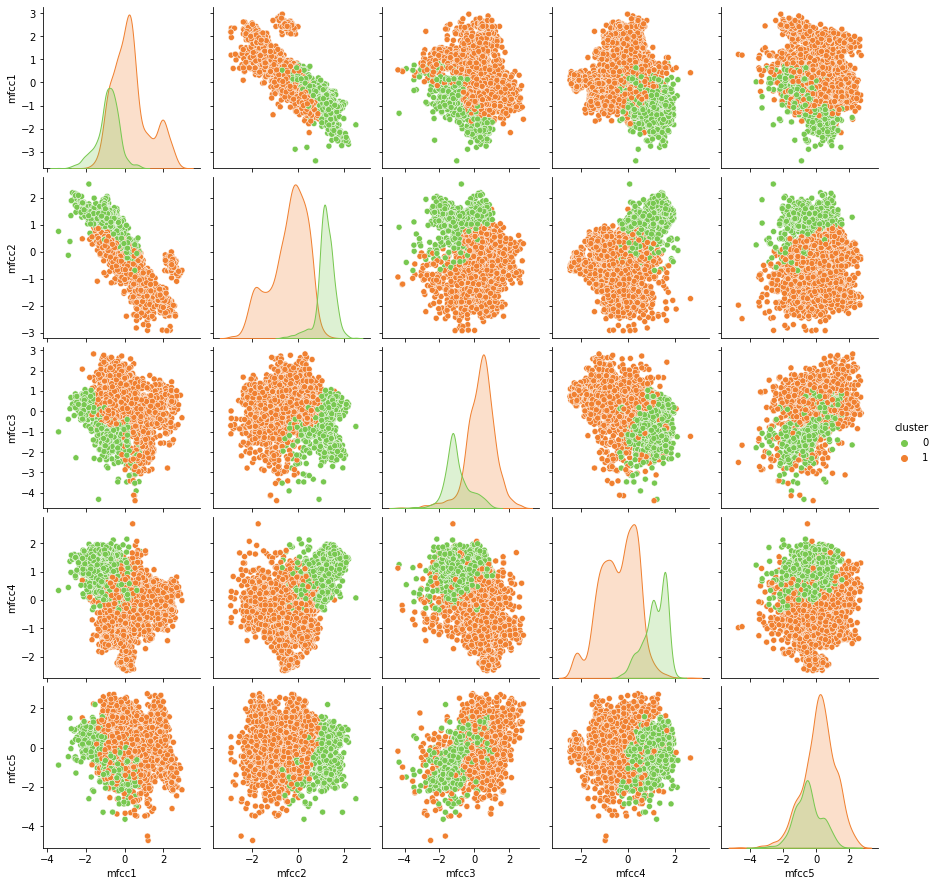

In [46]:
sns.pairplot(data_matrics_spec, hue = 'cluster', palette=['#78C850', '#F08030'])

In [41]:
from sklearn.cluster import AgglomerativeClustering

AggCluster= AgglomerativeClustering(n_clusters=2)
AggCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
data_metrics_AggCluster = data_matrics_normalized.join(cluster_labels.to_frame())

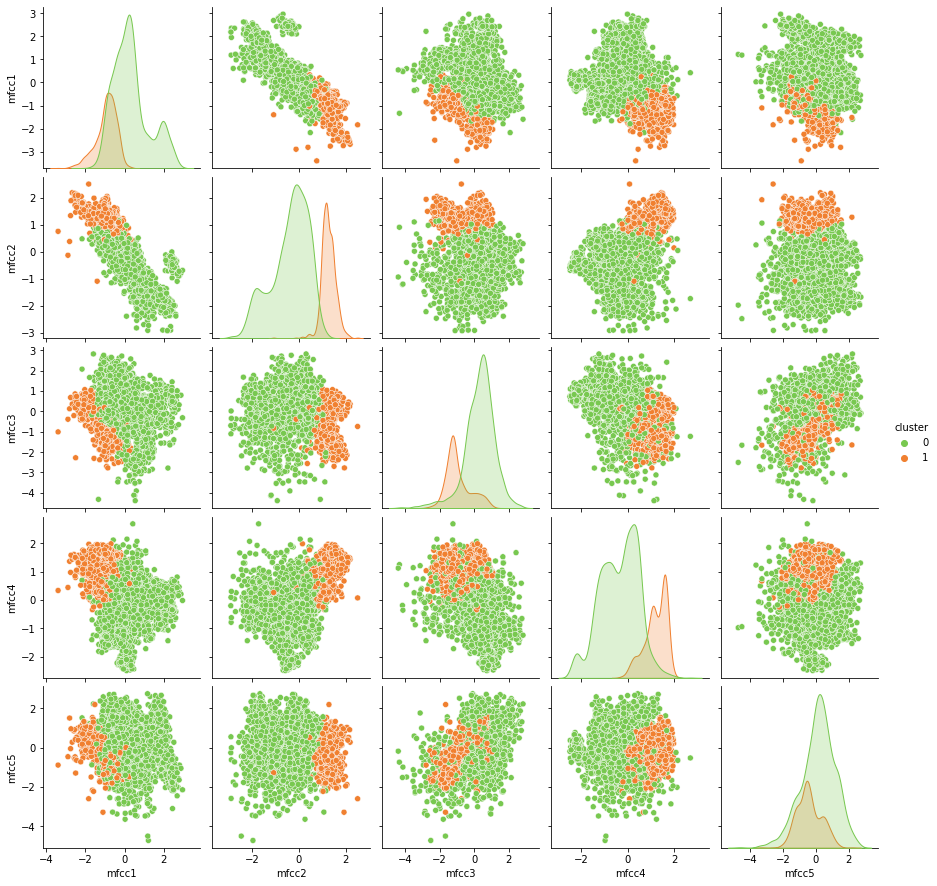

In [43]:
sns.pairplot(data_metrics_AggCluster, hue = 'cluster', palette=['#78C850', '#F08030'])

<AxesSubplot:title={'center':'Agglomerative Clustering'}, xlabel='mfcc1', ylabel='mfcc5'>

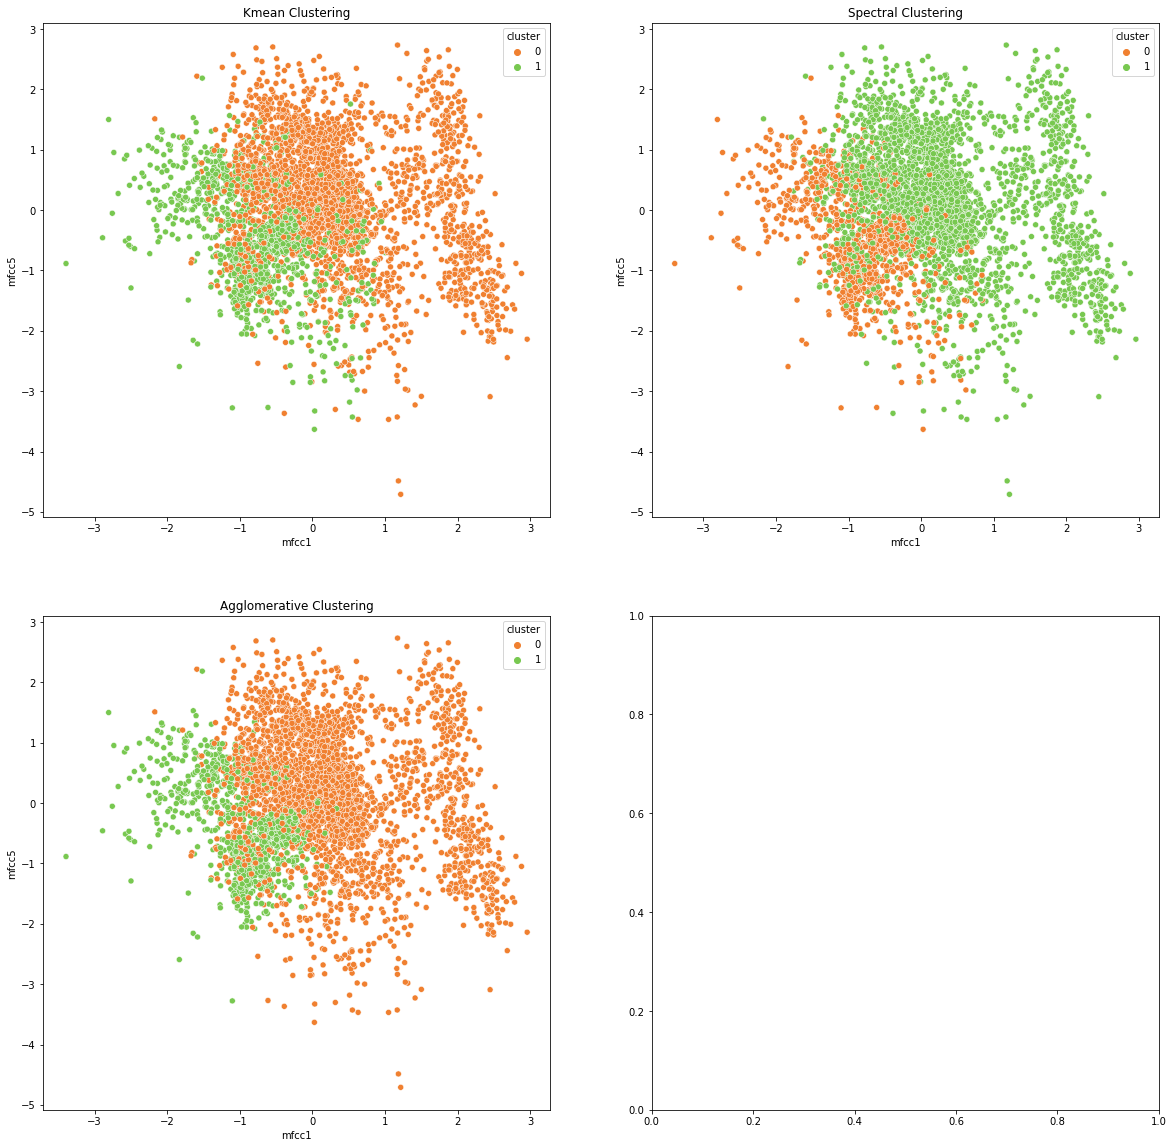

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes[0,0].title.set_text("Kmean Clustering")
axes[0,1].title.set_text("Spectral Clustering")
axes[1,0].title.set_text("Agglomerative Clustering")
# axes[1,1].title.set_text("Agglomerative Clustering")
sns.scatterplot(ax= axes[0,0], data=data_matrics_kmean, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[0,1], data=data_matrics_spec, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])
# sns.scatterplot(ax= axes[1,0], data=data_metrics_AffProp, x="mfcc1", y="mfcc2",hue = 'cluster', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[1,0], data=data_metrics_AggCluster, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])

In [23]:
iner=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(data_matrics_normalized)
    iner.append(kmeans.inertia_)
    cluster_labels = pd.Series(kmeans.labels_, name='cluster')

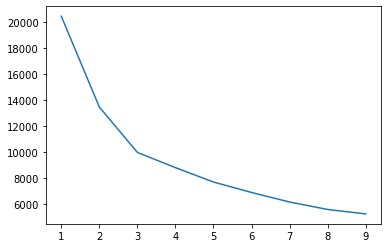

In [24]:
plt.plot(range(1,10), iner)
plt.show()

In [25]:
# iner=[]
# for k in range(1,10):
#     AggCluster= AgglomerativeClustering(n_clusters=k)
#     AggCluster.fit(data_matrics_normalized)
#     iner.append(AggCluster.distances_)
#     cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
# plt.plot(range(1,10), iner)
# plt.show()